In [1]:
import sys
sys.path.append("..")

In [15]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [9]:
train_lines, val_lines = read_annotation_lines('../dataset/txt/anno2.txt', test_size=0.1)
FOLDER_PATH = '../dataset/img'
class_name_path = '../class_names/classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)

model = Yolov4(weight_path=None, 
               class_name_path=class_name_path)



nms iou: 0.413 score: 0.3
2/2 [==============================] - 36s 10s/step - loss: 115663.3438 - val_loss: 117596.7344


In [18]:
CurrentDirectory = "./"

model_directory = CurrentDirectory + 'MODEL/'
tensorboard_directory = CurrentDirectory + 'Tensorboard'

In [25]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath=model_directory+'YOLOv4_epoch_-{epoch:03d}-valloss_{val_loss:.4f}.hdf5',
#                      filepath=model_directory+'YOLOv4_epoch_-{epoch:03d}-valloss_{val_loss:.4f}-val_acc{val_acc:.4f}.hdf5',
                        monitor='val_loss', 
                        verbose=1, 
                        save_best_only=True, 
                        mode='max')

# 학습과정 진행사항 확인
TB = TensorBoard(log_dir=tensorboard_directory, 
                        write_graph=True, 
                        write_images=True)

# Learning Rate 줄여나가기
# monitor 의 loss 함수를 보고 parience=3 번 이상 감소하지 않으면
# learning rate 에 factor=0.8 을 곱해라 
# 갈수록 learning rate 가 줄어드는 방향으로 학습
LR = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.8,
                        patience=3, 
                        verbose=1, 
                        min_lr=1e-8)

CALLBACK = [CP, TB, LR]

In [26]:
model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=2, 
          val_data_gen=data_gen_val,
          callbacks=CALLBACK)

Epoch 1/2
2/2 [==============================] - 19s 13s/step - loss: 9608.9893 - val_loss: 96231.4141

Epoch 00001: val_loss improved from -inf to 96231.41406, saving model to ./MODEL\YOLOv4_epoch_-001-valloss_96231.4141.hdf5
Epoch 2/2
2/2 [==============================] - 19s 7s/step - loss: 6754.2227 - val_loss: 90369.6562

Epoch 00002: val_loss did not improve from 96231.41406


img shape:  (600, 800, 3)
# of bboxes: 0


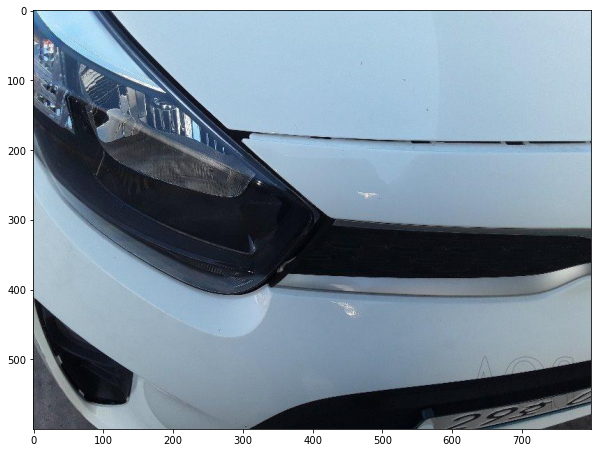

,x1,y1,x2,y2,class_name,score,w,h


In [12]:
model.predict('../dataset/img/0506234_sc-202337.jpg', random_color=True)